In [11]:
import pandas as pd
from mlflow.tracking import MlflowClient
import numpy as np

from matplotlib import pyplot as plt
from src.data_analysis.analysis_helpers import get_run_ids, get_labeledSamples_avgAcc, get_out_dirs
from src.database.mlflow import MLFlowClient
from src.database.mlflow import MLFlowClient
%matplotlib inline
# %pylab

import sys
import glob
sys.path.append('../')

from mlflow.tracking import MlflowClient
from src.database.mlflow import MLFlowClient
db = MLFlowClient(tracking_uri="http://mlflow.dbs.ifi.lmu.de:5000/", experiment_name="DMBAL")
tracking = MlflowClient()

In [12]:
runs_clusters10 = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.number_clusters","params.max_epochs", "params.learning_rate", "params.optimizer"],[True, True, True, True, True, True, True],["bp_smo_canceled", "margin", "kmeans",10, 30, 0.01, "Adam"])
print(len(runs_clusters10))
run_ids_clusters10 = get_run_ids(runs_clusters10)

10


In [13]:
runs_clusters100 = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.number_clusters","params.max_epochs", "params.learning_rate", "params.optimizer"],[True, True, True, True, True, True, True],["bp_smo_canceled", "margin", "kmeans",100, 30, 0.01, "Adam"])
print(len(runs_clusters100))
run_ids_clusters100 = get_run_ids(runs_clusters100)

10


In [14]:
runs_clusters1000 = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.max_epochs", "params.learning_rate", "params.number_clusters"],[True, True, True, True, True, True],["bp_smo_canceled", "margin", "kmeans", 30, 0.01, 1000])
print(len(runs_clusters1000))
run_ids_clusters1000 = get_run_ids(runs_clusters1000)

10


In [15]:
samples_labeled_clusters10, avg_accs_clusters10 = get_labeledSamples_avgAcc(run_ids_clusters10, tracking)
samples_labeled_clusters100, avg_accs_clusters100 = get_labeledSamples_avgAcc(run_ids_clusters100, tracking)
samples_labeled_clusters1000, avg_accs_clusters1000 = get_labeledSamples_avgAcc(run_ids_clusters1000, tracking)

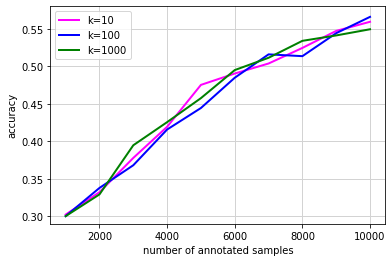

In [16]:
# plot
plt.plot(samples_labeled_clusters10, avg_accs_clusters10,color='magenta', label='k=10', linewidth=2)
plt.plot(samples_labeled_clusters100, avg_accs_clusters100,color='blue', label='k=100', linewidth=2)
plt.plot(samples_labeled_clusters1000, avg_accs_clusters1000,color='green', label='k=1000', linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.58])

plt.show()

In [ ]:
print(avg_accs_clusters10)

In [ ]:
print(avg_accs_clusters100)

In [ ]:
print(avg_accs_clusters1000)

[0.30232 0.33218 0.37787 0.41941 0.47527 0.49041 0.50379 0.52457 0.54727
 0.55944]


In [18]:
print(avg_accs_clusters100)

[0.30021 0.33784 0.36813 0.41575 0.44445 0.48481 0.51598 0.51358 0.54425
 0.56599]


In [19]:
print(avg_accs_clusters1000)

[0.30021 0.32922 0.39475 0.4256  0.45762 0.49502 0.51142 0.53402 0.54123
 0.54946]
